## 1 根据语法结构生成句子

### 1.1语法结构预处理

In [1]:
#语法结构
simple_grammar_frame = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [2]:
import random

In [3]:
def Create_Grammer(gram_frame, split = '=>'):
    grammer = {}
    for line in gram_frame.split('\n'):
        if not line.strip(): continue
        exp, stmt = line.split(split)
        grammer[exp.strip()] = [word.split() for word in stmt.split('|')] #word.split()也可以去掉空格
    return grammer

In [4]:
gram = Create_Grammer(simple_grammar_frame)
gram

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

### 1.2根据处理得到的语法结构随机生成句子

In [5]:
def Create_Sentence(gram, target = 'sentence'):
    if target not in gram: return target
    
    expanded = random.choice(gram[target])
    return ''.join(Create_Sentence(gram, target=r) for r in expanded if r!='null')

In [6]:
Create_Sentence(Create_Grammer(simple_grammar_frame))

'这个桌子看见一个桌子'

### 1.3测试不同的语法效果

In [7]:
#在西部世界里，一个”人类“的语言可以定义为：

human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 找找 | 想找点 
活动 = 乐子 | 玩的
"""

#一个“接待员”的语言可以定义为

host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = null
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""

In [8]:
Create_Sentence(gram=Create_Grammer(gram_frame= host, split='='), target='host')

'女士,您好我是19号,您需要喝酒吗？'

In [9]:
programming = """
stmt => if_exp | while_exp | assignment 
assignment => var = var
if_exp => if ( var ) { /n .... stmt }
while_exp=> while ( var ) { /n .... stmt }
var => chars number
chars => char | char char
char => student | name | info  | database | course
number => 1 | 2 | 3
"""

In [10]:
print(Create_Sentence(gram=Create_Grammer(programming, split='=>'), target='stmt'))

while(student2){/n....namecourse3=studentname2}


## 2  语言模型  （用来计算随机生成语言的合理性）

$$ language\_model(String) = Probability(String) \in (0, 1) $$

$$ Pro(w_1 w_2 w_3 w_4) = Pr(w_1 | w_2 w_3 w_ 4) * P(w2 | w_3 w_4) * Pr(w_3 | w_4) * Pr(w_4)$$ 

$$ 简化成2-GRAM： Pro(w_1 w_2 w_3 w_4) \sim Pr(w_1 | w_2 ) * P(w2 | w_3 ) * Pr(w_3 | w_4) * Pr(w_4)$$ 

In [11]:
filename = 'E:\\MYGIT\\DataSources\\sqlResult_1558435.csv'

In [12]:
import pandas as pd

In [13]:
content = pd.read_csv(filename, encoding='gb18030')

In [14]:
content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [15]:
articles = content['content'].tolist()

In [16]:
len(articles)

89611

In [17]:
import re

In [18]:
def token(string):
    return re.findall('\w+', string)

### 3.1文本预处理，去标点等等，保留村纯文本

In [19]:
articles_clean = [''.join(token(str(a))) for a in articles]

In [20]:
articles_clean[1]

'骁龙835作为唯一通过Windows10桌面平台认证的ARM处理器高通强调不会因为只考虑性能而去屏蔽掉小核心相反他们正联手微软找到一种适合桌面平台的兼顾性能和功耗的完美方案报道称微软已经拿到了一些新的源码以便Windows10更好地理解biglittle架构资料显示骁龙835作为一款集成了CPUGPU基带蓝牙WiFi的SoC比传统的Wintel方案可以节省至少30的PCB空间按计划今年Q4华硕惠普联想将首发骁龙835Win10电脑预计均是二合一形态的产品当然高通骁龙只是个开始未来也许还能见到三星Exynos联发科华为麒麟小米澎湃等进入Windows10桌面平台'

In [21]:
#把文章写入txt文件，每篇文章以换行分隔
with open('article_9k.txt', 'w') as f:
    for a in articles_clean:
        f.write(a + '\n')

In [22]:
import jieba

In [23]:
!dir

 驱动器 E 中的卷是 E
 卷的序列号是 0001-C921

 E:\MYGIT\jupyter\2019-summer-oliver 的目录

2019/06/30  23:15    <DIR>          .
2019/06/30  23:15    <DIR>          ..
2019/06/30  20:20    <DIR>          .ipynb_checkpoints
2019/07/01  14:59        64,368,892 article_9k.txt
2019/06/30  23:15            28,683 lesson-01.ipynb
               2 个文件     64,397,575 字节
               3 个目录 202,812,932,096 可用字节


### 3.2对所有文本分词处理，并保存到TOKEN列表中

In [24]:
def cut(string): return list(jieba.cut(string)) #jieba.cut返回迭代器，这里可用jieba.lcut(string)代替list(jieba.cut(string))

In [25]:
TOKEN = []
#cut(articles_clean[0])

In [27]:
with open('article_9k.txt', encoding='gb18030') as f:
    article = '1'
    i = 0
    while(article!= ''):
        article = f.readline()
        TOKEN += cut(article)
        i += 1
        if(i%10000 == 0):
            print(i)
#        if(i>20000):break
    print(i)

10000
20000
30000
40000
50000
60000
70000
80000
89612


In [28]:
len(TOKEN)

32876367

### 3.3对得到的TOKEN列表进行次数统计

In [29]:
from collections import Counter

In [30]:
words_count = Counter(TOKEN)

In [31]:
words_count.most_common(10) #返回列表取前100个

[('的', 1317926),
 ('n', 698213),
 ('在', 488993),
 ('月', 349317),
 ('日', 306633),
 ('新华社', 260021),
 ('和', 251079),
 ('了', 229201),
 ('年', 226719),
 ('是', 189467)]

In [32]:
TOKEN = [str(t) for t in TOKEN]

### 3.4 构建2-GRAM模型

In [33]:
TOKEN_2_GRAM = [''.join(TOKEN[i:i+2]) for i in range(len(TOKEN[:-2]))]

In [34]:
words_count_2 = Counter(TOKEN_2_GRAM)

In [35]:
def prob_1(word): return words_count[word] / len(TOKEN)

In [36]:
#2_GARM概率计算
def prob_2(word1, word2):
    if word1 + word2 in words_count_2: return words_count_2[word1+word2] / len(TOKEN_2_GRAM)
    else:
        return 1 / len(TOKEN_2_GRAM)

### 3.5测试2-GRAM模型效果

In [37]:
prob_2('我们', '在')

3.108616174567961e-05

In [38]:
prob_2('在', '吃饭')

3.041698800947124e-07

$$ 运用简化模型2-GRAM： Pro(w_1 w_2 w_3 w_4) \sim Pr(w_1 | w_2 ) * P(w2 | w_3 ) * Pr(w_3 | w_4) * Pr(w_4)$$ 

In [39]:
#计算整条语句的合理性概率
def get_probablity(sentence):
    words = cut(sentence)
    
    sentence_pro = 1
    
    for i, word in enumerate(words[:-1]):
        next_ = words[i+1]
        
        probability = prob_2(word, next_)
        
        sentence_pro *= probability
    
    return sentence_pro

In [40]:
get_probablity('小明今天抽奖抽到一台手机')

2.603640586518631e-37

In [41]:
get_probablity('小明今天抽奖抽到一架飞机')

1.6402935695067376e-36

In [42]:
get_probablity('洋葱奶昔来一杯')

5.628317848206865e-23

In [43]:
get_probablity('养乐多绿来一杯')

9.251931595683173e-16

In [44]:
for sen in [Create_Sentence(gram=Create_Grammer(simple_grammar_frame), target='sentence') for i in range(10)]:
    print('sentence: {} with Prb: {}'.format(sen, get_probablity(sen)))

sentence: 一个桌子看见一个蓝色的蓝色的小小的好看的蓝色的小小的小猫 with Prb: 4.087520657917973e-92
sentence: 这个小猫坐在这个蓝色的小猫 with Prb: 9.512891928673318e-42
sentence: 一个好看的蓝色的桌子看着一个篮球 with Prb: 2.782479146320502e-53
sentence: 一个小小的蓝色的好看的好看的小小的女人看见这个小小的桌子 with Prb: 2.547514774933422e-87
sentence: 一个好看的女人看着一个蓝色的好看的好看的小小的篮球 with Prb: 2.098008661083966e-87
sentence: 这个女人看见这个蓝色的小小的小猫 with Prb: 2.455120773465411e-49
sentence: 一个小小的女人看见一个桌子 with Prb: 1.7913047235248178e-35
sentence: 这个蓝色的女人听着这个小小的桌子 with Prb: 1.525524436308762e-51
sentence: 一个小小的好看的小小的蓝色的蓝色的蓝色的篮球看着一个好看的小小的小小的蓝色的蓝色的桌子 with Prb: 8.678333546423482e-140
sentence: 这个小猫坐在一个小小的蓝色的蓝色的蓝色的小猫 with Prb: 1.6802239556682199e-68


In [45]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = get_probablity(s1), get_probablity(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

今天晚上请你吃大餐，我们一起吃日料 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 8.905905868517037e-68
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 7.124724694813629e-68
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 3.952326410335282e-35
---- 真是一只好看的小猫 with probility 1.2993812566532249e-27
今晚我去吃火锅 is more possible
---- 今晚我去吃火锅 with probility 2.014937789658057e-20
---- 今晚火锅去吃我 with probility 1.6434861744230511e-28
养乐多绿来一杯 is more possible
---- 洋葱奶昔来一杯 with probility 5.628317848206865e-23
---- 养乐多绿来一杯 with probility 9.251931595683173e-16


In [46]:
import matplotlib.pyplot as plt

In [47]:
%matplotlib inline

In [48]:
frequiences = [f for w, f in words_count.most_common(10000)]

In [49]:
x = [i for i in range(10000)]

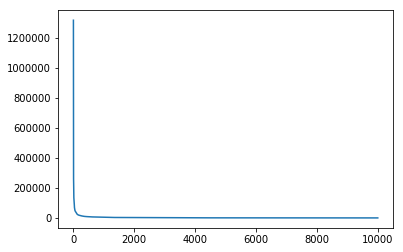

In [50]:
plt.plot(x, frequiences)

In [51]:
import numpy as np

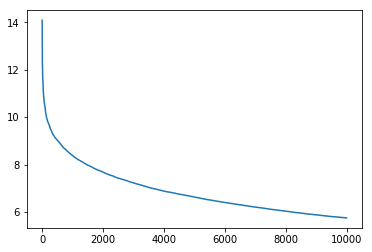

In [52]:
plt.plot(x, np.log(frequiences))